# Simulations for firm entry problem

This is an exercise I adapted from an Econometrics course I took. 

The main purpose of this notebook is to exercise MC simulations. I do that in the second part. In the first part I solve the problem with exact calculations. 

The context is a problem where a firm has to decide whether to enter to a market or not. In each market, up to 2 firms can enter. If no firm enters, each firms get a payoff of 0. If both firms enter, the profits are lower than the profits when one firm enter. The purpose is to predict the number of firms in each market estimating a model where firm and market characteristics are taken into account.

Let the payoff of a firm $i$ in a market $k$ be 0 if the firm does not enter, or $$\pi_{i,k}=X'_k \beta + \alpha Z_i - \delta log(N_k + 1) + \varepsilon_{i,k}$$
if the firm enters. Let $X_k$ be observed characteristics of the market and $Z_i$ firm fixed-effects. Let $N_k$ the number of firms that enter to the market (it can be 1 or 2). Suppose there are two market characteristics, $\varepsilon$ distribution is known and parameters are observed.

Both firms enter if, for i=1,2, $$X_1 \beta_1 + X_2 \beta_2 + Z_i \alpha - \delta log(3) > 0$$
No firms enter if, for i=1,2, $$X_1 \beta_1 + X_2 \beta_2 + Z_i \alpha - \delta log(2) < 0$$

From observing the markets we can compute the observed probabilities of 0, 1 and 2 firms competing. 

In this exercise:
* First, I compute the thresholds by using parametrizations of $\beta$, $\alpha$ and $\delta$, $Z_i$ and the distributions of $X_1$ and $X_2$. I can use the CDF of a known distribution for $\varepsilon$ to compute the probabilities of having 0, 1 or 2 firms in that market.
* Second, instead of computing the probabilities using a CDF, I draw a number of observations of $\varepsilon$ from that distribution and compare it to the to thresholds values.

In both cases, I estimate $E(N)$ for a vector of length 2000 (2000 markets) with randomized X values. In order to "draw" the density, I plot histograms. Both question 1 and question 2 give similar results on the probabilities and the expectations. 

#### Parametrizations

Let $X_1 \sim N(0,1)$ and $X_2 \sim N(0,3)$, $Z_1=1$ and $Z_2=2$.

Let $(\varepsilon_1, \varepsilon_2) \sim BVN \begin{pmatrix} 0 \\ 0 \end{pmatrix},  \begin{pmatrix} 1 & 0.5 \\ 0.5 & 1 \end{pmatrix}$

Let $\beta=[0.5, 1.2]$, $\alpha=-.5$, $\delta=.3$ and $K=2000$.

In [1]:
import numpy as np 
import math
from scipy.stats import multivariate_normal
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Setting parameters
beta = [0.5, 1.2]
alpha = -0.5
delta = 0.3
K=2000
Z1=1
Z2=2
M=[[1, 0.5], [0.5, 1]]

## Random variables
draws_X1 = [np.random.normal(0, 1) for _ in range(2000)]
draws_X2 = [np.random.normal(0, 3) for _ in range(2000)]
draws_eps = [np.random.multivariate_normal(mean=[0,0], cov=M) for _ in range(2000)]

## Initialize vectors with zero-vectors
r_1_0 = np.zeros(2000)
r_2_0 = np.zeros(2000)
r_1_2 = np.zeros(2000)
r_2_2 = np.zeros(2000)
p_0 = np.zeros(2000)
p_1 = np.zeros(2000)
p_2 = np.zeros(2000)
E_N = np.zeros(2000)

p_0_0 = np.zeros(2000)
p_2_1 = np.zeros(2000)

p_0_MC = np.zeros(2000)
p_1_MC = np.zeros(2000)
p_2_MC = np.zeros(2000)
E_N_MC = np.zeros(2000)


In [3]:
### Calculating thresholds for each market
for j in range(0,2000):
    r_1_0[j]= draws_X1[j] * beta[0] + draws_X2[j] * beta[1] + Z1 * alpha - delta * math.log(2)
    r_2_0[j]= draws_X1[j] * beta[0] + draws_X2[j] * beta[1] + Z2 * alpha - delta * math.log(2)
    r_1_2[j]= draws_X1[j] * beta[0] + draws_X2[j] * beta[1] + Z1 * alpha - delta * math.log(3)
    r_2_2[j]= draws_X1[j] * beta[0] + draws_X2[j] * beta[1] + Z2 * alpha - delta * math.log(3)

In [4]:
### Calculating probabilities using multivariate normal cdf
for j in range(0,2000):
    p_0[j] = multivariate_normal.cdf([(-1)*r_1_0[j], (-1)*r_2_0[j]], mean=[0,0], cov=M)
    p_2[j] = multivariate_normal.cdf([r_1_2[j], r_2_2[j]], mean=[0,0], cov=M)
    p_1[j] = 1-p_0[j]-p_2[j]
    E_N[j]=  p_1[j] +2*p_2[j] #### This give E(N) for each market

(array([672.,  61.,  42.,  29.,  25.,  24.,  14.,  15.,  17.,   9.,  12.,
         15.,  13.,   7.,  11.,  12.,  12.,   7.,   6.,  17.,  11.,   4.,
          9.,   5.,   6.,  12.,   7.,  11.,   2.,   5.,   3.,   5.,   9.,
          6.,  15.,   5.,   5.,   9.,   4.,   5.,   6.,   4.,   4.,   3.,
          6.,   8.,   4.,   2.,   3.,   3.,  10.,   8.,   8.,   8.,   4.,
          7.,   7.,   7.,   4.,   1.,  10.,   7.,   9.,   6.,   8.,   4.,
          1.,   5.,  11.,   8.,   5.,   4.,   2.,  13.,   4.,   8.,   8.,
          8.,  10.,   6.,  11.,   6.,   7.,   8.,  12.,  12.,   9.,   8.,
          5.,  12.,   6.,  15.,  14.,  16.,  22.,  24.,  18.,  27.,  45.,
        321.]),
 array([3.80638393e-52, 2.00000000e-02, 4.00000000e-02, 6.00000000e-02,
        8.00000000e-02, 1.00000000e-01, 1.20000000e-01, 1.40000000e-01,
        1.60000000e-01, 1.80000000e-01, 2.00000000e-01, 2.20000000e-01,
        2.40000000e-01, 2.60000000e-01, 2.80000000e-01, 3.00000000e-01,
        3.20000000e-01, 3.4000

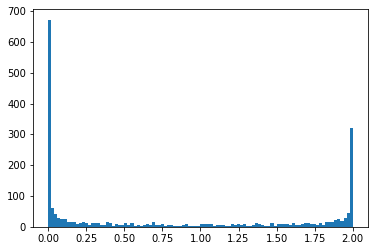

In [5]:
### Plotting histogram of E(N). It shows concentration on both 0 and 2. 
### However, a higher concentration close E(N)=0 occurs
plt.hist(x=E_N, bins=100)

In [6]:
### Second Question

for i in range(0,2000):
    p_0_MC_c = np.zeros(2000)
    p_2_MC_c = np.zeros(2000)
    for j in range(0,2000):
        # If both epsilon draws are lower than -r_0, I augment p_0 in 1/2000
        if draws_eps[j][0]< -r_1_0[i] and draws_eps[j][1]< -r_2_0[i]:
            p_0_MC_c[j] = 1 
        # If both epsilon draws are higher than -r_2, I augment p_2 in 1/2000
        if draws_eps[j][0]> -r_1_2[i] and draws_eps[j][1]> -r_2_2[i]:
            p_2_MC_c[j] = 1

    p_0_MC[i]=p_0_MC_c.sum()/2000    
    p_2_MC[i]=p_2_MC_c.sum()/2000
    p_1_MC[i]  = 1-p_0_MC[i] -p_2_MC[i] 
    E_N_MC[i]=  p_1_MC[i] + 2*p_2_MC[i]

(array([669.,  64.,  40.,  26.,  26.,  23.,  14.,  16.,  10.,  14.,  10.,
         13.,  16.,  11.,   9.,  11.,  13.,   9.,   7.,  13.,  15.,   4.,
          8.,   7.,   3.,  10.,  13.,   4.,   7.,   2.,   6.,   2.,   8.,
         10.,  11.,   9.,   3.,   4.,   9.,   4.,   5.,   6.,   4.,   4.,
          3.,   6.,   8.,   4.,   3.,   3.,   4.,  15.,   3.,  12.,   5.,
          3.,  10.,   6.,   4.,   4.,  10.,   6.,   9.,   7.,   9.,   3.,
          0.,   5.,  11.,   6.,   5.,   5.,   3.,   7.,   8.,  10.,   8.,
          9.,  10.,   7.,  10.,   7.,   6.,   9.,   9.,  11.,   8.,   8.,
         12.,  10.,   6.,  20.,  10.,  18.,  22.,  23.,  16.,  33.,  38.,
        321.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.

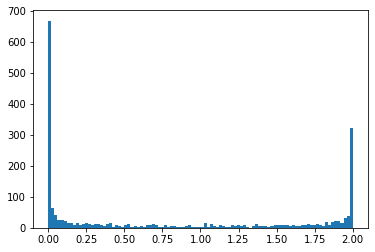

In [7]:
### Histogram for the E(N) calculated with simulations of epsilon. 
# Results are very similar to the previous part
# In the next cells, I compare probabilities and E(N) for each market
plt.hist(x=E_N_MC, bins=100)

(array([  1.,   0.,   2.,   7.,   8.,   5.,   7.,   6.,   2.,   6.,   3.,
          8.,   2.,   5.,   6.,   2.,   7.,   2.,   5.,   4.,   7.,   9.,
          3.,   6.,  10.,  10.,  12.,   4.,   8.,   8.,  11.,  11.,   4.,
          8.,  10.,  13.,  15.,  15.,  14.,  12.,  15.,  16.,  10.,  17.,
         23.,  15.,   7.,   8.,  12.,  11.,   6.,   3.,   2.,   4.,   4.,
          4.,   5.,   6.,   8.,  11.,   5.,  19.,  14.,  15.,  11.,  21.,
         22.,  39.,  50.,  42.,  39.,  54.,  84., 713., 150.,  82.,  59.,
         24.,   7.,   6.,  14.,  10.,  10.,   6.,   7.,   1.,   1.,   1.,
          2.,   2.,   0.,   3.,   3.,   3.,   6.,   2.,   4.,   0.,   0.,
          4.]),
 array([-2.10322586e-02, -2.07478473e-02, -2.04634359e-02, -2.01790245e-02,
        -1.98946132e-02, -1.96102018e-02, -1.93257904e-02, -1.90413791e-02,
        -1.87569677e-02, -1.84725563e-02, -1.81881450e-02, -1.79037336e-02,
        -1.76193223e-02, -1.73349109e-02, -1.70504995e-02, -1.67660882e-02,
        -1.648

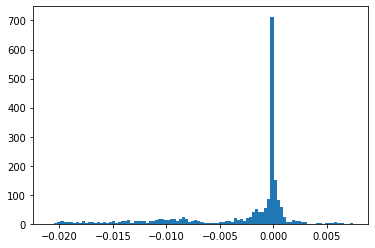

In [8]:
# I compare differences between two vectors of probabilities of no entry (p0)
# It seems that differences concentrate around 0. That happens also with p1 and p2. 
plt.hist(p_0_MC-p_0, bins=100)

(array([  3.,   4.,   4.,   5.,   3.,   2.,   3.,   1.,   0.,   2.,   4.,
          1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,
          2.,   3.,   4.,   1.,   4.,   4.,   5.,   8.,  17.,  15.,  11.,
          6.,   5.,  11.,   5.,  11.,   9.,  21., 123., 737.,  68.,  65.,
         35.,  30.,  38.,  39.,  38.,  37.,  36.,  22.,  26.,   9.,  14.,
         19.,  18.,  14.,  11.,  26.,  19.,  19.,  15.,  22.,  17.,  13.,
         11.,   9.,   9.,   6.,  15.,  11.,  21.,  18.,  20.,  20.,   9.,
          9.,  20.,  13.,   9.,  14.,  13.,  16.,  12.,  10.,  15.,   8.,
          8.,   6.,   1.,   4.,   1.,   3.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-1.72065501e-02, -1.67962303e-02, -1.63859104e-02, -1.59755905e-02,
        -1.55652706e-02, -1.51549508e-02, -1.47446309e-02, -1.43343110e-02,
        -1.39239912e-02, -1.35136713e-02, -1.31033514e-02, -1.26930315e-02,
        -1.22827117e-02, -1.18723918e-02, -1.14620719e-02, -1.10517521e-02,
        -1.064

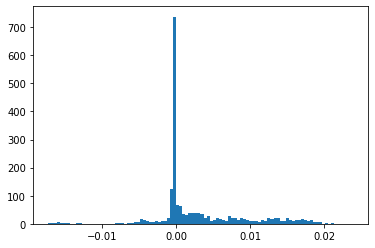

In [9]:
plt.hist(p_1_MC-p_1, bins=100)

(array([  1.,   1.,   1.,   3.,   2.,   4.,   8.,   7.,   6.,   3.,  10.,
         11.,  10.,   8.,  12.,  10.,   8.,  13.,  15.,  20.,  37.,  24.,
         16.,  31.,  40.,  41.,  37.,  34.,  23.,  28.,  26.,  40.,  68.,
        103., 842.,  64.,  62.,  32.,  24.,  21.,  22.,  27.,  14.,  18.,
         10.,  11.,  12.,  10.,  14.,   9.,   5.,   6.,   4.,  10.,   9.,
          4.,   9.,   5.,   3.,   4.,   3.,   5.,   2.,   3.,   1.,   1.,
          1.,   1.,   0.,   5.,   2.,   0.,   2.,   4.,   1.,   1.,   1.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   4.,   2.,   0.,   2.,
          1.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   1.,   1.,   0.,
          1.]),
 array([-0.00828792, -0.00804822, -0.00780852, -0.00756882, -0.00732912,
        -0.00708942, -0.00684973, -0.00661003, -0.00637033, -0.00613063,
        -0.00589093, -0.00565123, -0.00541153, -0.00517183, -0.00493213,
        -0.00469244, -0.00445274, -0.00421304, -0.00397334, -0.00373364,
        -0.00349394, -0.00

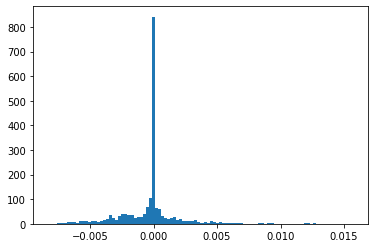

In [10]:
plt.hist(p_2_MC-p_2, bins=100)

(array([  1.,   2.,   2.,   4.,   5.,   7.,  11.,  11.,  14.,  17.,  14.,
          6.,  12.,  13.,  24.,  23.,  14.,  20.,  36.,  56.,  61., 147.,
        614.,  73.,  67.,  49.,  35.,  22.,  12.,  24.,  24.,  30.,  28.,
         23.,  10.,  21.,  14.,  13.,   9.,  15.,  10.,   9.,  13.,  16.,
         22.,  29.,  13.,  12.,  30.,  19.,   7.,  10.,  10.,  15.,  23.,
         16.,  17.,  15.,  12.,   4.,   9.,   9.,   3.,   6.,   4.,   6.,
          2.,   3.,   1.,   1.,   2.,   1.,   2.,   0.,   5.,   0.,   4.,
          0.,   3.,   3.,   4.,   3.,   1.,   3.,   2.,   6.,   3.,   4.,
          5.,   3.,   2.,   6.,   2.,   2.,   2.,   0.,   1.,   0.,   1.,
          1.]),
 array([-7.37641179e-03, -7.04345492e-03, -6.71049804e-03, -6.37754117e-03,
        -6.04458429e-03, -5.71162741e-03, -5.37867054e-03, -5.04571366e-03,
        -4.71275679e-03, -4.37979991e-03, -4.04684304e-03, -3.71388616e-03,
        -3.38092929e-03, -3.04797241e-03, -2.71501554e-03, -2.38205866e-03,
        -2.049

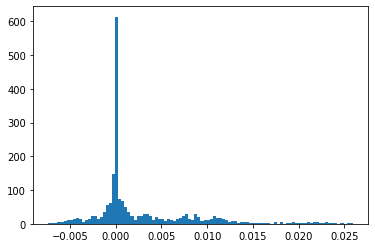

In [11]:
# Differences in E(N) are also concentrated around 0.
plt.hist(x=E_N_MC-E_N, bins=100)